In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# visulaize the important characteristics of the dataset
import matplotlib.pyplot as plt

# step 1: download the data
dataframe_all = pd.read_csv("Syngenta/Syngenta_2017/Experiment_dataset.csv")

# step 2: remove useless data
# count the number of missing elements (NaN) in each column
counter_nan = dataframe_all.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
# remove the columns with missing elements
dataframe_all = dataframe_all[counter_without_nan.keys()]
# remove the first 7 columns which contain no discriminative information
# dataframe_all = dataframe_all.ix[:,7:]
# the list of columns (the last column is the class label)
columns = dataframe_all.columns
# print(columns)



dataframe_all = dataframe_all.drop(['Experiment', 'Location', 'Planting date', 'Check Yield', 'Yield difference', 'Latitude', 'Longitude', 'Variety', 'PI'], axis=1)


# step 3: get features (x) and scale the features
# get x and convert it to numpy array
x = dataframe_all.ix[:,:-1].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

# step 4: get class labels y and then encode it into number 
# get class label data
# y = dataframe_all.ix[:,-1].values
y = dataframe_all.Yield

y = pd.qcut(y, q=3, labels=["high", "medium", "low"])

print(y)


print(y)
# encode the class label
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# step 5: split the data into training set and test set
test_percentage = 0.05
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0)

# t-distributed Stochastic Neighbor Embedding (t-SNE) visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, verbose=1)
x_test_2d = tsne.fit_transform(x_test)



/home/kafi/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/kafi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


0        medium
1          high
2          high
3          high
4          high
5          high
6          high
7          high
8          high
9          high
10          low
11          low
12          low
13          low
14         high
15         high
16         high
17         high
18          low
19          low
20          low
21          low
22       medium
23          low
24          low
25         high
26         high
27          low
28          low
29          low
          ...  
82006    medium
82007    medium
82008      high
82009    medium
82010    medium
82011      high
82012    medium
82013    medium
82014    medium
82015      high
82016       low
82017       low
82018       low
82019       low
82020       low
82021    medium
82022    medium
82023    medium
82024    medium
82025    medium
82026    medium
82027    medium
82028       low
82029    medium
82030       low
82031      high
82032      high
82033    medium
82034    medium
82035    medium
Name: Yield, Length: 820

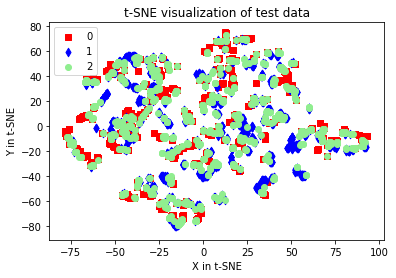

In [2]:
# scatter plot the sample points among 5 classes
# markers=('s', 'd', 'o', '^', 'v')
markers=('s', 'd', 'o', '^')
# color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    try:
        plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
    except KeyError:
        print("Key Error")
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()